主成分分析

例如，考慮一個股票指數，例如德國DAX指數，由30
不同的股票。所有股票的股價走勢共同決定了
指數的移動（通過一些有據可查的公式）。另外，股票價格
單個股票的變動通常是相關的，例如，由於
經濟狀況或某些部門的某些發展。
對於統計應用，通常很難使用30個相關因素來解釋
股票指數的變動。這就是PCA發揮作用的地方。它派生單，
不相關的組件“非常適合”以解釋庫存的變動
指數。人們可以將這些要素視為以下要素的線性組合（即投資組合）
從指數中選擇股票。與其使用30個相關的索引成分，
然後，一個人可以使用5、3或什至只有1個主要成分。
本節的示例說明了在這種情況下PCA的使用。我們檢索數據
德國DAX指數和構成該指數的所有股票。然後我們使用PCA
派生主要成分，我們用它們來構造所謂的pca_index。

In [81]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib . pyplot as plt
from sklearn.decomposition import KernelPCA


from matplotlib import style
style.use('ggplot')

%matplotlib inline 

start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()

In [82]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
'^GDAXI']

In [83]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, 'yahoo',start, end)['Close']
data = data.dropna() 

Wall time: 19.5 s


In [84]:
dax = pd.DataFrame(data.pop('^GDAXI')) 

In [85]:
data[data.columns[:9]].head() 

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE
Date,,,,,,,,,
2019-01-02,184.399994,175.000000,60.720001,60.860001,91.860001,69.739998,5.765,120.599998,45.250000
2019-01-03,183.949997,173.160004,60.020000,60.799999,91.360001,69.050003,5.802,121.400002,44.775002
2019-01-04,191.050003,177.360001,63.189999,64.900002,92.180000,71.709999,6.143,126.000000,47.070000
2019-01-07,189.699997,175.919998,62.900002,63.869999,91.279999,72.120003,6.182,126.400002,47.160000
2019-01-08,194.300003,176.100006,63.220001,65.519997,90.680000,72.209999,6.330,128.350006,47.500000


In [86]:
scale_function = lambda x: (x - x.mean()) / x.std() 

In [87]:
pca = KernelPCA().fit(data.apply(scale_function)) 

In [88]:
get_we = lambda x: x / x.sum() 
get_we(pca.lambdas_)[:10] 

array([0.44819791, 0.31155189, 0.09712673, 0.04521186, 0.02517448,
       0.01819137, 0.01326325, 0.00794082, 0.00679717, 0.00453531])

In [89]:
get_we(pca.lambdas_ )[:8].sum() 

0.9666583121063506

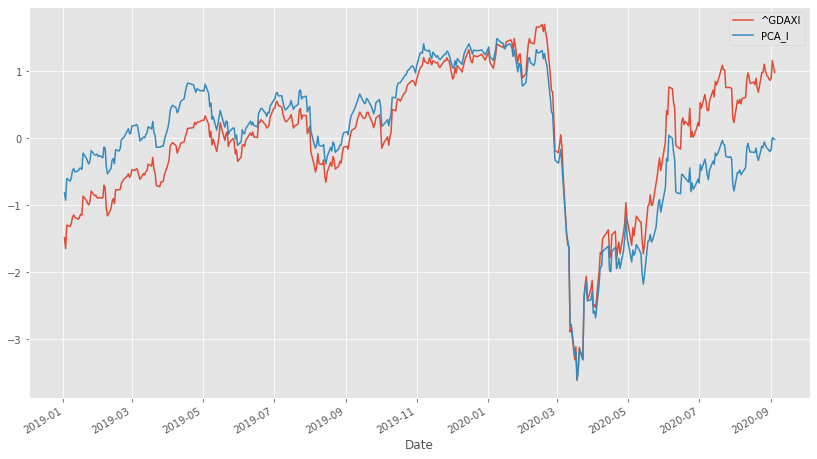

In [90]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function)) 
dax['PCA_l'] = pca.transform(-data) 
dax.apply(scale_function).plot(figsize=(14, 8))


In [91]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform( -data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights) 

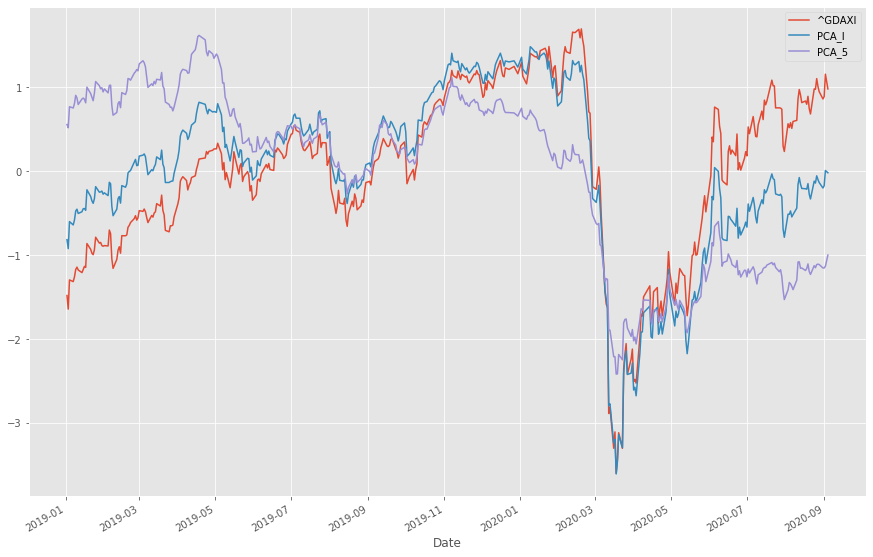

In [92]:
dax.apply(scale_function).plot(figsize=(15, 10)) 

In [93]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

array([737061., 737062., 737063., 737066., 737067., 737068., 737069.,
       737070., 737073., 737074., 737075., 737076., 737077., 737080.,
       737081., 737082., 737083., 737084., 737087., 737088., 737089.,
       737090., 737091., 737094., 737095., 737096., 737097., 737098.,
       737101., 737102., 737103., 737104., 737105., 737108., 737109.,
       737110., 737111., 737112., 737115., 737116., 737117., 737118.,
       737119., 737122., 737123., 737124., 737125., 737126., 737129.,
       737130., 737131., 737132., 737133., 737136., 737137., 737138.,
       737139., 737140., 737143., 737144., 737145., 737146., 737147.,
       737150., 737151., 737152., 737153., 737154., 737157., 737158.,
       737159., 737160., 737161., 737164., 737165., 737166., 737167.,
       737172., 737173., 737174., 737175., 737178., 737179., 737181.,
       737182., 737185., 737186., 737187., 737188., 737189., 737192.,
       737193., 737194., 737195., 737196., 737199., 737200., 737201.,
       737202., 7372

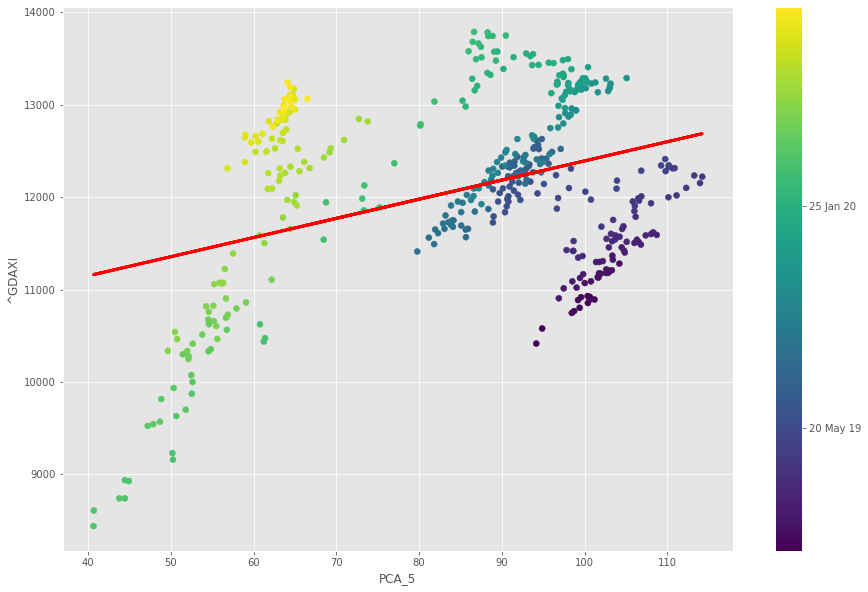

In [95]:
plt.figure(figsize=(15, 10))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
dax['^GDAXI'], 1),
dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
format=mpl.dates.DateFormatter('%d %b %y'))



如果PCA索引能夠完美地複制DAX索引，我們將
期望所有點都在一條直線上，並看到回歸線通過
這些要點。 完美很難實現，但是我們可以做得更好。
為此，讓我們將總時間範圍分為兩個子間隔。 然後我們可以
實施早期和晚期回歸：

In [99]:
cut_date = '2020/3/10'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index < cut_date], 1),early_pca)


In [100]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dax['^GDAXI'][dax.index >= cut_date], 1), late_pca)


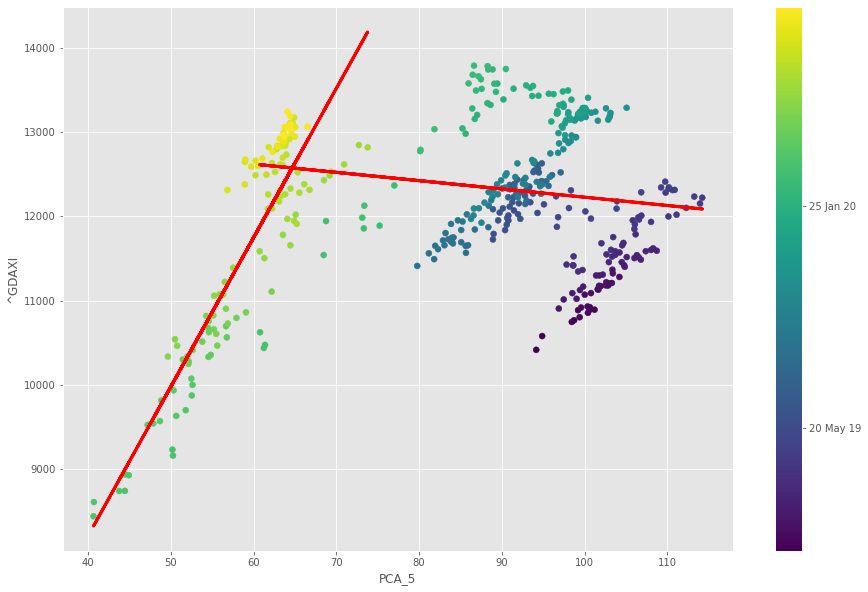

In [102]:
plt.figure(figsize=(15, 10))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
format=mpl.dates.DateFormatter('%d %b %y'))